<a href="https://colab.research.google.com/github/ShenZi-Ast/Drug-Discovery/blob/main/DrugDiscovery.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PART 1 **Computational Drug Discovery**

Sina ShenZi-Ast

***Collecting Bioactivity Data***

📘 **Steps :**

1.   Installing & importing required libraries. 📚
2.   Using [ChEMBL](https://www.ebi.ac.uk/chembl/) data-base to select our desired target.
3. Filtering potency of a substance **(IC50)**.
4. Processing unique **ChEMBL ID, SMILES, Standard Value** of each compound.
5. Labeling compunds as  (Active ✅,Intermediate 🟨,Inactive 🟥).
6. Creating "First_Tabel.csv".

📘 **Step 1.1 :**

Installing and importing required libraries

In [1]:
pip install chembl_webresource_client

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.2/55.2 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.4/61.4 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 8.2 MB/s eta 0:00:00


In [2]:
import pandas as pd
from chembl_webresource_client.new_client import new_client

📘 **Step 2.1:**

Searching in ChEMBL database to find the desired chemical compound, which in this case is **"NAME OF THE COMPUND"**

In [3]:
target = new_client.target
target_query = target.search('acetylcholinesterase')
targets = pd.DataFrame.from_dict(target_query)
targets

,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,"[{'xref_id': 'P22303', 'xref_name': None, 'xre...",Homo sapiens,Acetylcholinesterase,28.0,False,CHEMBL220,"[{'accession': 'P22303', 'component_descriptio...",SINGLE PROTEIN,9606
1,[],Homo sapiens,Cholinesterases; ACHE & BCHE,28.0,False,CHEMBL2095233,"[{'accession': 'P06276', 'component_descriptio...",SELECTIVITY GROUP,9606
2,[],Drosophila melanogaster,Acetylcholinesterase,18.0,False,CHEMBL2242744,"[{'accession': 'P07140', 'component_descriptio...",SINGLE PROTEIN,7227
3,[],Bemisia tabaci,AChE2,16.0,False,CHEMBL2366409,"[{'accession': 'B3SST5', 'component_descriptio...",SINGLE PROTEIN,7038
4,[],Leptinotarsa decemlineata,Acetylcholinesterase,16.0,False,CHEMBL2366490,"[{'accession': 'Q27677', 'component_descriptio...",SINGLE PROTEIN,7539
5,"[{'xref_id': 'P04058', 'xref_name': None, 'xre...",Torpedo californica,Acetylcholinesterase,15.0,False,CHEMBL4780,"[{'accession': 'P04058', 'component_descriptio...",SINGLE PROTEIN,7787
6,"[{'xref_id': 'P21836', 'xref_name': None, 'xre...",Mus musculus,Acetylcholinesterase,15.0,False,CHEMBL3198,"[{'accession': 'P21836', 'component_descriptio...",SINGLE PROTEIN,10090
7,"[{'xref_id': 'P37136', 'xref_name': None, 'xre...",Rattus norvegicus,Acetylcholinesterase,15.0,False,CHEMBL3199,"[{'accession': 'P37136', 'component_descriptio...",SINGLE PROTEIN,10116
8,"[{'xref_id': 'O42275', 'xref_name': None, 'xre...",Electrophorus electricus,Acetylcholinesterase,15.0,False,CHEMBL4078,"[{'accession': 'O42275', 'component_descriptio...",SINGLE PROTEIN,8005
9,"[{'xref_id': 'P23795', 'xref_name': None, 'xre...",Bos taurus,Acetylcholinesterase,15.0,False,CHEMBL4768,"[{'accession': 'P23795', 'component_descriptio...",SINGLE PROTEIN,9913


In [4]:
selected_target = targets.target_chembl_id[0]
selected_target

'CHEMBL220'

📘 **Step 3.1:**


*   Filtering activity data of the selected chemical compund based on **standard_type="IC50**"
*   Save it to a DataFrame and csv file as Bio_activity.csv



In [5]:
activity = new_client.activity
res = activity.filter(target_chembl_id=selected_target).filter(standard_type="IC50")


In [6]:
#df = pd.DataFrame.from_dict(res)
#df

In [7]:
#df.to_csv('Bio_activity.csv', index=False)

In [8]:
df = pd.read_csv('Bio_activity.csv')
df

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,NaN,NaN,33969,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,NaN,NaN,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,NaN,NaN,IC50,uM,UO_0000065,NaN,0.75
1,NaN,NaN,37563,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,NaN,NaN,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,NaN,NaN,IC50,uM,UO_0000065,NaN,0.10
2,NaN,NaN,37565,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,NaN,NaN,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,NaN,NaN,IC50,uM,UO_0000065,NaN,50.00
3,NaN,NaN,38902,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,NaN,NaN,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,NaN,NaN,IC50,uM,UO_0000065,NaN,0.30
4,NaN,NaN,41170,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,NaN,NaN,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,NaN,NaN,IC50,uM,UO_0000065,NaN,0.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9086,"{'action_type': 'INHIBITOR', 'description': 'N...",NaN,25111481,[],CHEMBL5265203,Inhibition of AChE (unknown origin),B,NaN,NaN,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,NaN,NaN,IC50,uM,UO_0000065,NaN,0.16
9087,NaN,NaN,25402914,[],CHEMBL5303778,Cross screening panel,B,NaN,NaN,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,NaN,NaN,pIC50,NaN,UO_0000065,NaN,5.10
9088,NaN,NaN,25402962,[],CHEMBL5303826,Cross screening panel,B,NaN,NaN,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,NaN,NaN,pIC50,NaN,UO_0000065,NaN,4.00
9089,NaN,NaN,25403899,[],CHEMBL5303876,Cross screening panel,B,NaN,NaN,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,NaN,NaN,pIC50,NaN,UO_0000065,NaN,4.20


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9091 entries, 0 to 9090
Data columns (total 46 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   action_type                1315 non-null   object 
 1   activity_comment           1338 non-null   object 
 2   activity_id                9091 non-null   int64  
 3   activity_properties        9091 non-null   object 
 4   assay_chembl_id            9091 non-null   object 
 5   assay_description          9091 non-null   object 
 6   assay_type                 9091 non-null   object 
 7   assay_variant_accession    0 non-null      float64
 8   assay_variant_mutation     0 non-null      float64
 9   bao_endpoint               9091 non-null   object 
 10  bao_format                 9091 non-null   object 
 11  bao_label                  9091 non-null   object 
 12  canonical_smiles           9056 non-null   object 
 13  data_validity_comment      640 non-null    objec

📘 **Step 4.1:**

Removing **null** and **duplicated** values from *standard_value* and *canonical_smiles*.


In [10]:
df2= df[df.standard_value.notna()]
df2= df[df.canonical_smiles.notna()]
df2

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,NaN,NaN,33969,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,NaN,NaN,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,NaN,NaN,IC50,uM,UO_0000065,NaN,0.75
1,NaN,NaN,37563,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,NaN,NaN,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,NaN,NaN,IC50,uM,UO_0000065,NaN,0.10
2,NaN,NaN,37565,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,NaN,NaN,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,NaN,NaN,IC50,uM,UO_0000065,NaN,50.00
3,NaN,NaN,38902,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,NaN,NaN,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,NaN,NaN,IC50,uM,UO_0000065,NaN,0.30
4,NaN,NaN,41170,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,NaN,NaN,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,NaN,NaN,IC50,uM,UO_0000065,NaN,0.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9086,"{'action_type': 'INHIBITOR', 'description': 'N...",NaN,25111481,[],CHEMBL5265203,Inhibition of AChE (unknown origin),B,NaN,NaN,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,NaN,NaN,IC50,uM,UO_0000065,NaN,0.16
9087,NaN,NaN,25402914,[],CHEMBL5303778,Cross screening panel,B,NaN,NaN,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,NaN,NaN,pIC50,NaN,UO_0000065,NaN,5.10
9088,NaN,NaN,25402962,[],CHEMBL5303826,Cross screening panel,B,NaN,NaN,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,NaN,NaN,pIC50,NaN,UO_0000065,NaN,4.00
9089,NaN,NaN,25403899,[],CHEMBL5303876,Cross screening panel,B,NaN,NaN,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,NaN,NaN,pIC50,NaN,UO_0000065,NaN,4.20


In [11]:
df2_nr = df2.drop_duplicates(['canonical_smiles'])
df2_nr

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,NaN,NaN,33969,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,NaN,NaN,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,NaN,NaN,IC50,uM,UO_0000065,NaN,0.75
1,NaN,NaN,37563,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,NaN,NaN,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,NaN,NaN,IC50,uM,UO_0000065,NaN,0.10
2,NaN,NaN,37565,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,NaN,NaN,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,NaN,NaN,IC50,uM,UO_0000065,NaN,50.00
3,NaN,NaN,38902,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,NaN,NaN,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,NaN,NaN,IC50,uM,UO_0000065,NaN,0.30
4,NaN,NaN,41170,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,NaN,NaN,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,NaN,NaN,IC50,uM,UO_0000065,NaN,0.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9086,"{'action_type': 'INHIBITOR', 'description': 'N...",NaN,25111481,[],CHEMBL5265203,Inhibition of AChE (unknown origin),B,NaN,NaN,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,NaN,NaN,IC50,uM,UO_0000065,NaN,0.16
9087,NaN,NaN,25402914,[],CHEMBL5303778,Cross screening panel,B,NaN,NaN,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,NaN,NaN,pIC50,NaN,UO_0000065,NaN,5.10
9088,NaN,NaN,25402962,[],CHEMBL5303826,Cross screening panel,B,NaN,NaN,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,NaN,NaN,pIC50,NaN,UO_0000065,NaN,4.00
9089,NaN,NaN,25403899,[],CHEMBL5303876,Cross screening panel,B,NaN,NaN,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,NaN,NaN,pIC50,NaN,UO_0000065,NaN,4.20


🟢 Creating a combined DataFrame to indicate each compound Bioactivity class.

In [12]:
selection = ['molecule_chembl_id','canonical_smiles','standard_value']
df3 = df2_nr[selection]
df3

,molecule_chembl_id,canonical_smiles,standard_value
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,750.00
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,100.00
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,50000.00
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,300.00
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,800.00
...,...,...,...
9086,CHEMBL2238282,O=C(/C=C/c1ccc(N2CCCCC2)cc1)c1sccc1Cl,160.00
9087,CHEMBL4636881,CC(=O)Nc1c(F)cc(C(=O)N[C@H]2CC[C@H](O)CC2)cc1O...,7943.28
9088,CHEMBL4635134,CNC(=O)c1cc(C(=O)NC2CC2)cn(Cc2ccccc2)c1=O,100000.00
9089,CHEMBL4639128,COCc1nc2cnc3cc(-c4c(C)noc4C)c(OC[C@H]4CCNC4)cc...,63095.73


📘 **Step 5.1:**

Indicating each compund status as **(Active ✅,Intermediate 🟨,Inactive 🟥)** by creating a bioactivity class and defining the threshold.

In [13]:
bioactivity_threshold = []
for i in df3.standard_value:
  if float(i) >= 10000:
    bioactivity_threshold.append("inactive")
  elif float(i) <= 1000:
    bioactivity_threshold.append("active")
  else:
    bioactivity_threshold.append("intermediate")

📘 **Step 6.1:**

Creating First_Tabel.csv

In [14]:
bioactivity_class = pd.Series(bioactivity_threshold, name='class')
df4 = pd.concat([df3, bioactivity_class], axis=1)
df4 = df4.dropna()
df4.to_csv('First_Tabel.csv', index=False)
df4

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,750.0,active
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,100.0,active
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,50000.0,inactive
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,300.0,active
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,800.0,active
...,...,...,...,...
7525,CHEMBL4649545,COc1c2c(cc3c1OCO3)[C@]13C=C[C@H](OC)C[C@@H]1[N...,100000.0,active
7526,CHEMBL4646747,COc1c2c(cc3c1OCO3)[C@]13C=C[C@H](OC)C[C@@H]1[N...,48000.0,intermediate
7527,CHEMBL4634465,COc1c2c(cc3c1OCO3)[C@]13C=C[C@H](OC)C[C@@H]1[N...,54000.0,inactive
7528,CHEMBL4637652,COc1ccc(C(=O)O[C@@H]2C[N@@]3Cc4c(cc5c(c4OC)OCO...,100000.0,inactive


In [15]:
! ls -l

total 5496
-rw-r--r-- 1 root root 5200159 Jul 24 08:15 Bio_activity.csv
-rw-r--r-- 1 root root  421069 Jul 24 08:15 First_Tabel.csv
drwxr-xr-x 1 root root    4096 Jul 22 13:21 sample_data


# PART 2: Lipinski & Mann-Whitney Test

📘 **Steps:**

1.   Deep cleaning data from **null** and **duplicate** SMILES
2.   Installing **Rdkit** & Creating **"df_lipinski"** with *Lipinski's rule of five* 🤚
3. Convert IC50 to **pIC50**
4. Normilizing **Standard_value** & **pIC50**
5. MW / LogP Bar ✅
6. **Mann-Whitney U-Test** & **Statistical Bars** 📊





---


**Step 1.2:**

This type of cleaning can be helpful in ensuring consistency and accuracy when working with SMILES data in cheminformatics or drug discovery tasks.

In essence, this code extracts the longest substring from each canonical smiles string in the dataframe, likely to remove any additional information or fragments attached to the main smiles representation.

In [40]:
df_no_smiles = df4.drop(columns='canonical_smiles')

In [41]:
smiles = []

for i in df.canonical_smiles.tolist():
  cpd = str(i).split('.')
  cpd_longest = max(cpd, key = len)
  smiles.append(cpd_longest)

smiles = pd.Series(smiles, name = 'canonical_smiles')

In [42]:
df_clean_smiles = pd.concat([df_no_smiles,smiles], axis=1)
df5 = df_clean_smiles.dropna()
df5

,molecule_chembl_id,standard_value,class,canonical_smiles
0,CHEMBL133897,750.0,active,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1
1,CHEMBL336398,100.0,active,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1
2,CHEMBL131588,50000.0,inactive,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1
3,CHEMBL130628,300.0,active,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F
4,CHEMBL130478,800.0,active,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C
...,...,...,...,...
7525,CHEMBL4649545,100000.0,active,COc1c2c(cc3c1OCO3)[C@]13C=C[C@H](OC)C[C@@H]1[N...
7526,CHEMBL4646747,48000.0,intermediate,COc1c2c(cc3c1OCO3)[C@]13C=C[C@H](OC)C[C@@H]1[N...
7527,CHEMBL4634465,54000.0,inactive,COc1c2c(cc3c1OCO3)[C@]13C=C[C@H](OC)C[C@@H]1[N...
7528,CHEMBL4637652,100000.0,inactive,COc1ccc(C(=O)O[C@@H]2C[N@@]3Cc4c(cc5c(c4OC)OCO...


In [43]:
! ls -l

total 6552
-rw-r--r-- 1 root root 5200159 Jul 24 08:15 Bio_activity.csv
-rw-r--r-- 1 root root  421069 Jul 24 08:15 First_Tabel.csv
-rw-r--r-- 1 root root   13482 Jul 24 08:19 plot_bioactivity_class.pdf
drwxr-xr-x 1 root root    4096 Jul 22 13:21 sample_data
-rw-r--r-- 1 root root  630279 Jul 24 08:16 Second_Tabel.csv
-rw-r--r-- 1 root root  430172 Jul 24 08:16 Third_Tabel.csv




---


📘 **Step 2.2:**

> Investigating Druglikness with Lipinski's rule of five

**Lipinski's Rule stated the following:**

1.  Molecular weight < 500 Dalton
2.  Octanol-water partition coefficient (LogP) < 5
3. Hydrogen bond donors < 5
4. Hydrogen bond acceptors < 10






In [44]:
pip install rdkit

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

In [46]:
# Inspired by: https://codeocean.com/explore/capsules?query=tag:data-curation
def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem)
        moldata.append(mol)

    baseData= np.arange(1,1)
    i=0
    for mol in moldata:

        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)

        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])

        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1

    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)

    return descriptors

In [47]:
df_lipinski = lipinski(df5.canonical_smiles)
df_lipinski.dropna(subset=['MW','LogP','NumHDonors','NumHAcceptors']) #added to solve NaN data in df _combined
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,312.325,2.8032,0.0,6.0
1,376.913,4.5546,0.0,5.0
2,426.851,5.3574,0.0,5.0
3,404.845,4.7069,0.0,5.0
4,346.334,3.0953,0.0,6.0
...,...,...,...,...
5062,480.473,2.9682,0.0,9.0
5063,480.473,2.9682,0.0,9.0
5064,480.473,2.9682,0.0,9.0
5065,465.502,3.0686,0.0,8.0


In [48]:
df5.reset_index(drop=True, inplace=True)  #Reseting Index to avoiding NaN data
df_lipinski.reset_index(drop=True, inplace=True)

In [49]:
df_combined = pd.concat([df5,df_lipinski], axis=1)
df_combined.to_csv('Second_Tabel.csv', index=False)
df_combined

,molecule_chembl_id,standard_value,class,canonical_smiles,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL133897,750.0,active,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,312.325,2.8032,0.0,6.0
1,CHEMBL336398,100.0,active,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,376.913,4.5546,0.0,5.0
2,CHEMBL131588,50000.0,inactive,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,426.851,5.3574,0.0,5.0
3,CHEMBL130628,300.0,active,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,404.845,4.7069,0.0,5.0
4,CHEMBL130478,800.0,active,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,346.334,3.0953,0.0,6.0
...,...,...,...,...,...,...,...,...
5062,CHEMBL4649545,100000.0,active,COc1c2c(cc3c1OCO3)[C@]13C=C[C@H](OC)C[C@@H]1[N...,480.473,2.9682,0.0,9.0
5063,CHEMBL4646747,48000.0,intermediate,COc1c2c(cc3c1OCO3)[C@]13C=C[C@H](OC)C[C@@H]1[N...,480.473,2.9682,0.0,9.0
5064,CHEMBL4634465,54000.0,inactive,COc1c2c(cc3c1OCO3)[C@]13C=C[C@H](OC)C[C@@H]1[N...,480.473,2.9682,0.0,9.0
5065,CHEMBL4637652,100000.0,inactive,COc1ccc(C(=O)O[C@@H]2C[N@@]3Cc4c(cc5c(c4OC)OCO...,465.502,3.0686,0.0,8.0


In [50]:
df_combined.dropna(subset=['MW','LogP','class','standard_value','molecule_chembl_id','canonical_smiles']) #added to solve NaN data in df_combined

,molecule_chembl_id,standard_value,class,canonical_smiles,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL133897,750.0,active,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,312.325,2.8032,0.0,6.0
1,CHEMBL336398,100.0,active,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,376.913,4.5546,0.0,5.0
2,CHEMBL131588,50000.0,inactive,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,426.851,5.3574,0.0,5.0
3,CHEMBL130628,300.0,active,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,404.845,4.7069,0.0,5.0
4,CHEMBL130478,800.0,active,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,346.334,3.0953,0.0,6.0
...,...,...,...,...,...,...,...,...
5062,CHEMBL4649545,100000.0,active,COc1c2c(cc3c1OCO3)[C@]13C=C[C@H](OC)C[C@@H]1[N...,480.473,2.9682,0.0,9.0
5063,CHEMBL4646747,48000.0,intermediate,COc1c2c(cc3c1OCO3)[C@]13C=C[C@H](OC)C[C@@H]1[N...,480.473,2.9682,0.0,9.0
5064,CHEMBL4634465,54000.0,inactive,COc1c2c(cc3c1OCO3)[C@]13C=C[C@H](OC)C[C@@H]1[N...,480.473,2.9682,0.0,9.0
5065,CHEMBL4637652,100000.0,inactive,COc1ccc(C(=O)O[C@@H]2C[N@@]3Cc4c(cc5c(c4OC)OCO...,465.502,3.0686,0.0,8.0




---


📘 **Step 3.2:**

**Converting IC50 to pIC50**

Comparing IC50 values can be cumbersome due to the wide range.

**pIC50** values provide a more linear scale for comparison.

pIC50 is simply the negative logarithm of the IC50 value. It's a transformed value that makes it easier to compare compounds with widely different IC50 values.


---


This custom function pIC50() will accept a DataFrame as input and will:


*   Take the IC50 values from the ``standard_value`` column and converts it from nM to M by multiplying the value by 10$^{-9}$
*   Take the molar value and apply -log10
*   Delete the ``standard_value`` column and create a new ``pIC50`` column


In [51]:
#Point to note: Values greater than 100,000,000 will be fixed at 100,000,000 otherwise the negative logarithmic value will become negative.
# https://github.com/chaninlab/estrogen-receptor-alpha-qsar/blob/master/02_ER_alpha_RO5.ipynb

def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', axis=1) #'axis=1' specifies that we're dropping a column

    return x

In [52]:
df_combined.standard_value.describe()

count    5.067000e+03
mean     1.075285e+05
std      9.884525e+05
min      5.000000e-06
25%      1.201150e+02
50%      2.000000e+03
75%      1.516000e+04
max      4.960000e+07
Name: standard_value, dtype: float64

In [53]:
-np.log10( (10**-9)* 100000000 )

1.0

In [54]:
-np.log10( (10**-9)* 10000000000 )

-1.0



---


📘 **Step 4.2:**

Normalizing the **standard_value** and **pIC50**

The result is a DataFrame with a normalized **standard_value_norm** column in place of the original standard_value column.

In [55]:
def norm_value(input):
    norm = []

    for i in input['standard_value']:
        if i > 100000000:
          i = 100000000
        norm.append(i)

    input['standard_value_norm'] = norm
    x = input.drop('standard_value', axis=1)

    return x

In [56]:
df_norm = norm_value(df_combined)
df_norm

,molecule_chembl_id,class,canonical_smiles,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
0,CHEMBL133897,active,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,312.325,2.8032,0.0,6.0,750.0
1,CHEMBL336398,active,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,376.913,4.5546,0.0,5.0,100.0
2,CHEMBL131588,inactive,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,426.851,5.3574,0.0,5.0,50000.0
3,CHEMBL130628,active,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,404.845,4.7069,0.0,5.0,300.0
4,CHEMBL130478,active,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,346.334,3.0953,0.0,6.0,800.0
...,...,...,...,...,...,...,...,...
5062,CHEMBL4649545,active,COc1c2c(cc3c1OCO3)[C@]13C=C[C@H](OC)C[C@@H]1[N...,480.473,2.9682,0.0,9.0,100000.0
5063,CHEMBL4646747,intermediate,COc1c2c(cc3c1OCO3)[C@]13C=C[C@H](OC)C[C@@H]1[N...,480.473,2.9682,0.0,9.0,48000.0
5064,CHEMBL4634465,inactive,COc1c2c(cc3c1OCO3)[C@]13C=C[C@H](OC)C[C@@H]1[N...,480.473,2.9682,0.0,9.0,54000.0
5065,CHEMBL4637652,inactive,COc1ccc(C(=O)O[C@@H]2C[N@@]3Cc4c(cc5c(c4OC)OCO...,465.502,3.0686,0.0,8.0,100000.0


In [57]:
df_norm.standard_value_norm.describe()

count    5.067000e+03
mean     1.075285e+05
std      9.884525e+05
min      5.000000e-06
25%      1.201150e+02
50%      2.000000e+03
75%      1.516000e+04
max      4.960000e+07
Name: standard_value_norm, dtype: float64

In [58]:
df_final = pIC50(df_norm)
df_final

,molecule_chembl_id,class,canonical_smiles,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL133897,active,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,312.325,2.8032,0.0,6.0,6.124939
1,CHEMBL336398,active,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,376.913,4.5546,0.0,5.0,7.000000
2,CHEMBL131588,inactive,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,426.851,5.3574,0.0,5.0,4.301030
3,CHEMBL130628,active,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,404.845,4.7069,0.0,5.0,6.522879
4,CHEMBL130478,active,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,346.334,3.0953,0.0,6.0,6.096910
...,...,...,...,...,...,...,...,...
5062,CHEMBL4649545,active,COc1c2c(cc3c1OCO3)[C@]13C=C[C@H](OC)C[C@@H]1[N...,480.473,2.9682,0.0,9.0,4.000000
5063,CHEMBL4646747,intermediate,COc1c2c(cc3c1OCO3)[C@]13C=C[C@H](OC)C[C@@H]1[N...,480.473,2.9682,0.0,9.0,4.318759
5064,CHEMBL4634465,inactive,COc1c2c(cc3c1OCO3)[C@]13C=C[C@H](OC)C[C@@H]1[N...,480.473,2.9682,0.0,9.0,4.267606
5065,CHEMBL4637652,inactive,COc1ccc(C(=O)O[C@@H]2C[N@@]3Cc4c(cc5c(c4OC)OCO...,465.502,3.0686,0.0,8.0,4.000000


In [59]:
df_final.pIC50.describe()

count    5067.000000
mean        5.873562
std         1.597745
min         1.304518
25%         4.819302
50%         5.698970
75%         6.920403
max        14.301030
Name: pIC50, dtype: float64



---


📘 **Step 5.2:**

Removing the **'intermediate'** 🟨 class from dataset and saving the result as Third_Tabel.csv



In [60]:
df_2class = df_final[df_final['class'] != 'intermediate']
df_2class.to_csv('Third_Tabel.csv', index=False)
df_2class

,molecule_chembl_id,class,canonical_smiles,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL133897,active,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,312.325,2.8032,0.0,6.0,6.124939
1,CHEMBL336398,active,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,376.913,4.5546,0.0,5.0,7.000000
2,CHEMBL131588,inactive,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,426.851,5.3574,0.0,5.0,4.301030
3,CHEMBL130628,active,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,404.845,4.7069,0.0,5.0,6.522879
4,CHEMBL130478,active,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,346.334,3.0953,0.0,6.0,6.096910
...,...,...,...,...,...,...,...,...
5061,CHEMBL4636736,active,COc1c2c(cc3c1OCO3)[C@]13C=C[C@H](OC)C[C@@H]1[N...,485.536,4.2132,0.0,7.0,4.000000
5062,CHEMBL4649545,active,COc1c2c(cc3c1OCO3)[C@]13C=C[C@H](OC)C[C@@H]1[N...,480.473,2.9682,0.0,9.0,4.000000
5064,CHEMBL4634465,inactive,COc1c2c(cc3c1OCO3)[C@]13C=C[C@H](OC)C[C@@H]1[N...,480.473,2.9682,0.0,9.0,4.267606
5065,CHEMBL4637652,inactive,COc1ccc(C(=O)O[C@@H]2C[N@@]3Cc4c(cc5c(c4OC)OCO...,465.502,3.0686,0.0,8.0,4.000000


In [61]:
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt

<ipython-input-62-fd667696f017>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='class', data=df_2class, edgecolor='black', palette=colors)


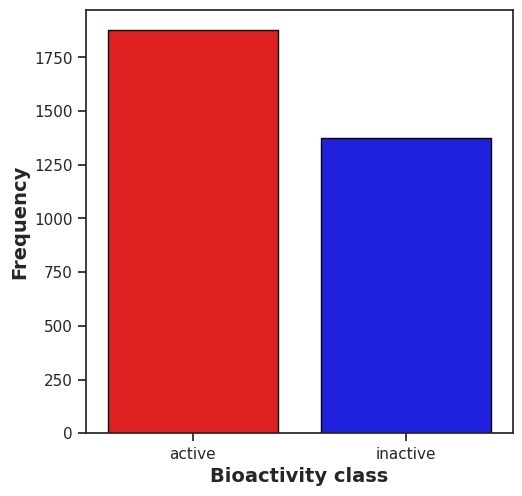

In [62]:
plt.figure(figsize=(5.5, 5.5))

# Define a color palette
colors = ["#FF0000", "#0000FF"]  # Example: Red for inactive, blue for active

sns.countplot(x='class', data=df_2class, edgecolor='black', palette=colors)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.savefig('plot_bioactivity_class.pdf')



---


📘 **Step 6.2:** 📊

Scatter plot of **"LogP"** vs **"MW"**

**MW:**
* **Size of the molecule:** Higher MW typically indicates a larger molecule.

* **Potential for drug-like properties:** Very high MW compounds often have poor drug-like properties due to issues like poor solubility and permeability.


**LogP**

* **Lipophilicity:** Higher LogP values indicate a more lipophilic (fat-soluble) compound.

* **Distribution:** LogP influences how a compound distributes between aqueous and lipid environments (e.g., blood and cell membranes).

* **Potential for drug-like properties**: Both very high and very low LogP values can lead to poor drug-like properties.


❗
**Solubility:** High **LogP** values often correlate with poor water solubility, which can affect drug formulation and delivery.

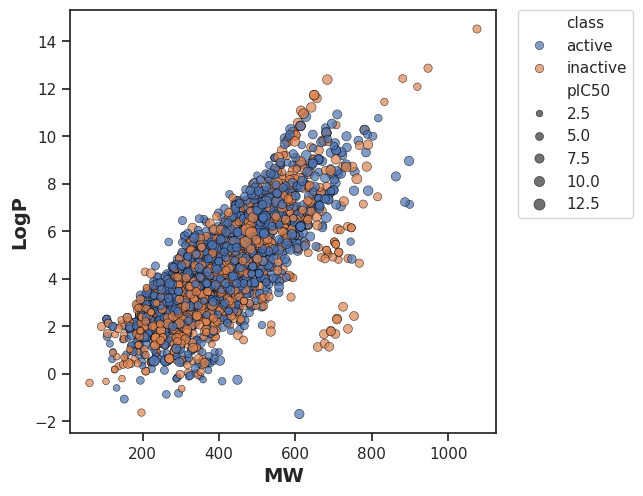

In [63]:
plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='MW', y='LogP', data=df_2class, hue='class', size='pIC50', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.savefig('plot_MW_vs_LogP.pdf')

📘 **Steps 7.2:**

**Mann-Whitney U Test:**

The Mann-Whitney U test is a **non-parametric** statistical test used to compare two independent samples.

 It assesses whether there is a significant difference in the distributions of the two groups.



---
**T-test:**
Parametric test: Assumes data follows a normal distribution.
Compares the means of two groups.
Sensitive to outliers.
More powerful when assumptions are met.

**Mann-Whitney U test:**
Non-parametric test: Doesn't require data to follow a specific distribution.
Compares the distributions of two groups.
Robust to outliers.
Less powerful than the T-test when assumptions of the T-test are met.

❕ **When to use which:**

**T-test:** If your data is normally distributed and you want to compare means.

**Mann-Whitney U test:** If your data is not normally distributed, you have outliers, or you're unsure about the distribution.


In [64]:
def mannwhitney(descriptor, verbose=False):
  # https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

# seed the random number generator
  seed(1)

# actives and inactives
  selection = [descriptor, 'class']
  df = df_2class[selection]
  active = df[df['class'] == 'active']
  active = active[descriptor]

  selection = [descriptor, 'class']
  df = df_2class[selection]
  inactive = df[df['class'] == 'inactive']
  inactive = inactive[descriptor]

# compare samples
  stat, p = mannwhitneyu(active, inactive)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0]).to_csv(filename)

  return pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])

✅ **Interpreting the Results:** 🔴

* It sets a significance level **(alpha)** of *0.05.*

* If the ***p-value*** (p) is greater than the alpha level (alpha), the function interprets the results as "**Same distribution** (fail to reject H0).

* This means you fail to reject the null hypothesis, which states that the **distributions of the two groups are the same**.

If the ***p-value*** (p) is **less than or equal to the alpha** level (alpha), the function interprets the results as "**Different distribution**"- (reject H0). This means you reject the null hypothesis and conclude that the distributions of the two groups are different.


---



⛓ **"pIC50" Distribution:**

Resualt: *reject H0* ✅

In [65]:
mannwhitney('pIC50')

,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,1354006.0,0.017485,0.05,Different distribution (reject H0)


<ipython-input-66-e60577c2358b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'class', y = 'pIC50', data = df_2class, palette=colors)


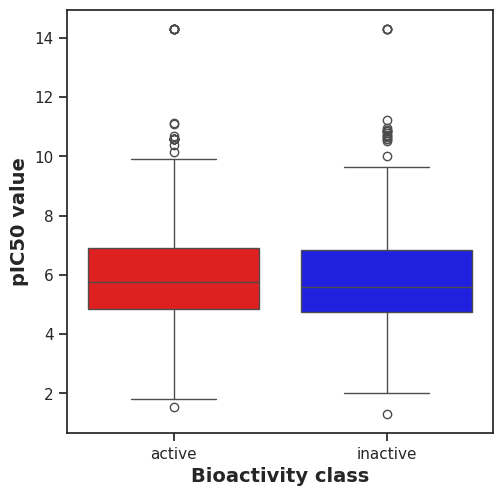

In [66]:
plt.figure(figsize=(5.5, 5.5))
colors = ["#FF0000", "#0000FF"]
sns.boxplot(x = 'class', y = 'pIC50', data = df_2class, palette=colors)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

plt.savefig('plot_ic50.pdf')



---


⛓ **"MW" Distribution:**  

Result : *FAIL TO REJECT H0* ❎


In [67]:
mannwhitney('MW')

,Descriptor,Statistics,p,alpha,Interpretation
0,MW,1324834.5,0.202706,0.05,Same distribution (fail to reject H0)


<ipython-input-68-58783d171dd8>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'class', y = 'MW', data = df_2class,palette=colors)


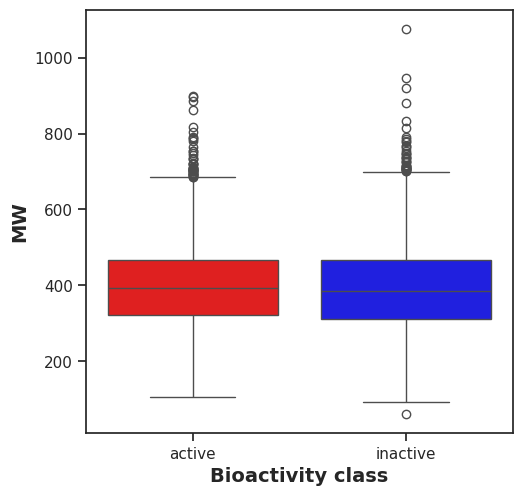

In [68]:
plt.figure(figsize=(5.5, 5.5))
colors = ["#FF0000", "#0000FF"]
sns.boxplot(x = 'class', y = 'MW', data = df_2class,palette=colors)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')

plt.savefig('plot_MW.pdf')




---


⛓ **"LogP" Distribution:**

**Resualt:** *Reject H0* ✅

In [69]:
mannwhitney('LogP')


,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,1383471.0,0.000483,0.05,Different distribution (reject H0)


<ipython-input-70-30649b48c138>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'class', y = 'LogP', data = df_2class,palette=colors)


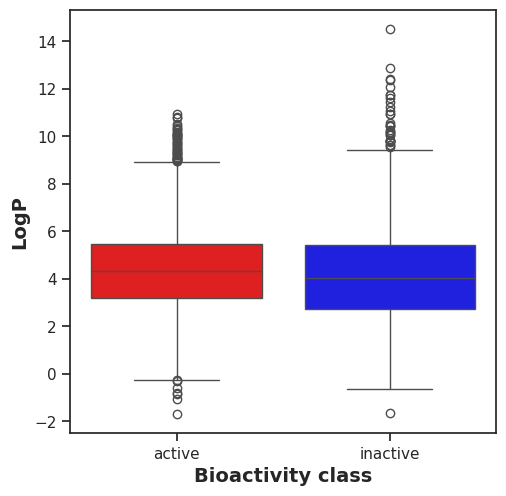

In [70]:
plt.figure(figsize=(5.5, 5.5))
colors = ["#FF0000", "#0000FF"]
sns.boxplot(x = 'class', y = 'LogP', data = df_2class,palette=colors)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')

plt.savefig('plot_LogP.pdf')



---


⛓ **"NumHDonors" Distribution:**

**Resualt:** *Fail to rejech H0* ❎


In [71]:
mannwhitney('NumHDonors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,1265142.0,0.302535,0.05,Same distribution (fail to reject H0)


<ipython-input-72-8a06a0b143cf>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'class', y = 'NumHDonors', data = df_2class, palette=colors)


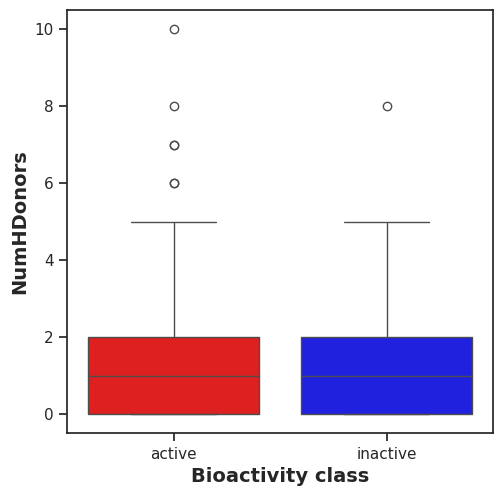

In [72]:
plt.figure(figsize=(5.5, 5.5))
colors = ["#FF0000", "#0000FF"]
sns.boxplot(x = 'class', y = 'NumHDonors', data = df_2class, palette=colors)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHDonors.pdf')



---


⛓ **NumHAcceptors Distribution:**

**Resualt:** *reject H0* ✅

In [73]:
mannwhitney('NumHAcceptors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,1351105.0,0.02118,0.05,Different distribution (reject H0)


<ipython-input-74-60398e4fe1a4>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'class', y = 'NumHAcceptors', data = df_2class, palette=colors)


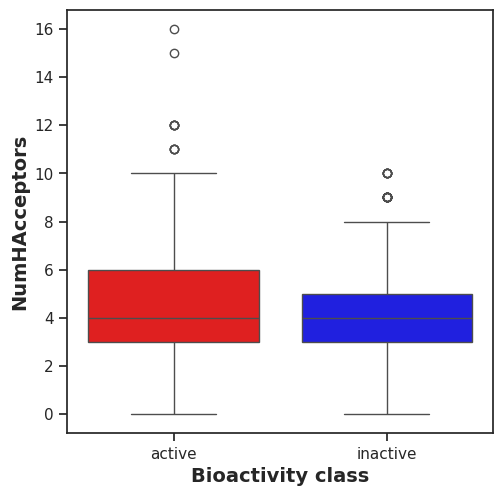

In [74]:
plt.figure(figsize=(5.5, 5.5))
colors = ["#FF0000", "#0000FF"]
sns.boxplot(x = 'class', y = 'NumHAcceptors', data = df_2class, palette=colors)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHAcceptors.pdf')

❗
Taking a look at pIC50 values, the actives and inactives displayed statistically significant difference, which is to be expected since threshold values (IC50 < 1,000 nM = Actives while IC50 > 10,000 nM = Inactives, corresponding to pIC50 > 6 = Actives and pIC50 < 5 = Inactives) were used to define actives and inactives.


---

❗
**Lipinski's descriptors:**

All of the 4 Lipinski's descriptors exhibited statistically significant difference between the actives and inactives.

---



# PART 3: Calculating Molecular FP

📘 **Steps:**

**TUT** Descriptor Calculation and Dataset Preparation ⚡


1.   Installing & importing required libraries **padelpy** & **padel-wrapper** 📚
2.   Calculating Molecular Fingerprints by using PaDEL
3.   Combining pIC50 with PubChem Fingerprints creating **"dataset4.to_csv"**



**Recalling df_final**

In [75]:
df_final

,molecule_chembl_id,class,canonical_smiles,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL133897,active,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,312.325,2.8032,0.0,6.0,6.124939
1,CHEMBL336398,active,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,376.913,4.5546,0.0,5.0,7.000000
2,CHEMBL131588,inactive,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,426.851,5.3574,0.0,5.0,4.301030
3,CHEMBL130628,active,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,404.845,4.7069,0.0,5.0,6.522879
4,CHEMBL130478,active,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,346.334,3.0953,0.0,6.0,6.096910
...,...,...,...,...,...,...,...,...
5062,CHEMBL4649545,active,COc1c2c(cc3c1OCO3)[C@]13C=C[C@H](OC)C[C@@H]1[N...,480.473,2.9682,0.0,9.0,4.000000
5063,CHEMBL4646747,intermediate,COc1c2c(cc3c1OCO3)[C@]13C=C[C@H](OC)C[C@@H]1[N...,480.473,2.9682,0.0,9.0,4.318759
5064,CHEMBL4634465,inactive,COc1c2c(cc3c1OCO3)[C@]13C=C[C@H](OC)C[C@@H]1[N...,480.473,2.9682,0.0,9.0,4.267606
5065,CHEMBL4637652,inactive,COc1ccc(C(=O)O[C@@H]2C[N@@]3Cc4c(cc5c(c4OC)OCO...,465.502,3.0686,0.0,8.0,4.000000


📘 **Step 3.1 :**

Instaling required librearies



In [76]:
pip install padelpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.9/20.9 MB 48.4 MB/s eta 0:00:00


In [77]:
pip install padel-pywrapper

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.5/37.5 MB 8.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for install-jdk: filename=install_jdk-0.3.0-py3-none-any.whl size=3725 sha256=f3cf059014dff2cdbd9a1b9769967a51763f48669d9df3cb97173e08add29c22
  Stored in directory: /root/.cache/pip/wheels/79/7a/47/9a4619174f7ca0f1068edb7a5412730a37365b6d183b0b3847
Successfully built install-jdk


In [78]:
selection = ['canonical_smiles','molecule_chembl_id']
df4_selection = df4[selection]                                 ## DF3 in tutarial cheeeeek it more
df4_selection.to_csv('molecule.smi', sep='\t', index=False, header=False)

In [79]:
! cat molecule.smi | head -5

CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1	CHEMBL133897
O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1	CHEMBL336398
CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1	CHEMBL131588
O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F	CHEMBL130628
CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C	CHEMBL130478


In [80]:
! cat molecule.smi | wc -l

5067


📘 **Step 3.2:**

Calculating Molecular Fingerprints by using PaDEL

* **Molecular descriptors**

 are numerical representations of molecular properties. They convert chemical information into data for analysis and prediction, used in fields like drug discovery, materials science, and environmental science.


---


[PaDEL-Descriptor](http://www.yapcwsoft.com/dd/)

**PaDEL descriptors** are molecular descriptors generated using PaDEL-Descriptor, an open-source Java-based software. This tool calculates over 800 molecular descriptors and more than 10 types of molecular fingerprints, facilitating cheminformatics and **computational chemistry** tasks. Key types of PaDEL descriptors include:

 ℹ *More Info:*
[Additional Link](https://pubmed.ncbi.nlm.nih.gov/21425294/)


⏬ **Downloading [PaDEL-Descriptor]**

In [81]:
! wget https://github.com/ShenZi-Ast/Drug-Discovery/raw/main/padel.zip
! wget https://github.com/ShenZi-Ast/Drug-Discovery/raw/main/padel.sh

--2024-07-24 08:21:15--  https://github.com/ShenZi-Ast/Drug-Discovery/raw/main/padel.zip
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/ShenZi-Ast/Drug-Discovery/main/padel.zip [following]
--2024-07-24 08:21:15--  https://raw.githubusercontent.com/ShenZi-Ast/Drug-Discovery/main/padel.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25768637 (25M) [application/zip]
Saving to: ‘padel.zip’

padel.zip           100%[===================>]  24.57M  --.-KB/s    in 0.1s    

2024-07-24 08:21:16 (216 MB/s) - ‘padel.zip’ saved [25768637/25768637]

--2024-07-24 08:21:16--  https://github.com/ShenZi-Ast

In [82]:
! unzip padel.zip

Archive:  padel.zip
   creating: PaDEL-Descriptor/
  inflating: __MACOSX/._PaDEL-Descriptor  
  inflating: PaDEL-Descriptor/MACCSFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._MACCSFingerprinter.xml  
  inflating: PaDEL-Descriptor/AtomPairs2DFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._AtomPairs2DFingerprinter.xml  
  inflating: PaDEL-Descriptor/EStateFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._EStateFingerprinter.xml  
  inflating: PaDEL-Descriptor/Fingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._Fingerprinter.xml  
  inflating: PaDEL-Descriptor/.DS_Store  
  inflating: __MACOSX/PaDEL-Descriptor/._.DS_Store  
   creating: PaDEL-Descriptor/license/
  inflating: __MACOSX/PaDEL-Descriptor/._license  
  inflating: PaDEL-Descriptor/KlekotaRothFingerprintCount.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._KlekotaRothFingerprintCount.xml  
  inflating: PaDEL-Descriptor/config  
  inflating: __MACOSX/PaDEL-Descriptor/._config  
  inf

In [83]:
! cat padel.sh

java -Xms1G -Xmx1G -Djava.awt.headless=true -jar ./PaDEL-Descriptor/PaDEL-Descriptor.jar -removesalt -standardizenitro -fingerprints -descriptortypes ./PaDEL-Descriptor/PubchemFingerprinter.xml -dir ./ -file descriptors_output.csv


In [84]:
! bash padel.sh

Streaming output truncated to the last 5000 lines.
Processing CHEMBL556172 in molecule.smi (68/5067). Average speed: 0.39 s/mol.
Processing CHEMBL544669 in molecule.smi (70/5067). Average speed: 0.38 s/mol.
Processing CHEMBL62664 in molecule.smi (71/5067). Average speed: 0.38 s/mol.
Processing CHEMBL155111 in molecule.smi (72/5067). Average speed: 0.37 s/mol.
Processing CHEMBL1203534 in molecule.smi (73/5067). Average speed: 0.38 s/mol.
Processing CHEMBL541044 in molecule.smi (74/5067). Average speed: 0.37 s/mol.
Processing CHEMBL543779 in molecule.smi (75/5067). Average speed: 0.36 s/mol.
Processing CHEMBL64011 in molecule.smi (77/5067). Average speed: 0.36 s/mol.
Processing CHEMBL155495 in molecule.smi (76/5067). Average speed: 0.36 s/mol.
Processing CHEMBL65585 in molecule.smi (78/5067). Average speed: 0.35 s/mol.
Processing CHEMBL347539 in molecule.smi (79/5067). Average speed: 0.36 s/mol.
Processing CHEMBL154433 in molecule.smi (80/5067). Average speed: 0.35 s/mol.
Processing CHEM

In [85]:
! ls -l

total 41528
-rw-r--r-- 1 root root  5200159 Jul 24 08:15 Bio_activity.csv
-rw-r--r-- 1 root root  9018132 Jul 24 08:46 descriptors_output.csv
-rw-r--r-- 1 root root   421069 Jul 24 08:15 First_Tabel.csv
drwxr-xr-x 3 root root     4096 Jul 24 08:21 __MACOSX
-rw-r--r-- 1 root root      125 Jul 24 08:20 mannwhitneyu_LogP.csv
-rw-r--r-- 1 root root      123 Jul 24 08:20 mannwhitneyu_MW.csv
-rw-r--r-- 1 root root      132 Jul 24 08:20 mannwhitneyu_NumHAcceptors.csv
-rw-r--r-- 1 root root      131 Jul 24 08:20 mannwhitneyu_NumHDonors.csv
-rw-r--r-- 1 root root      125 Jul 24 08:20 mannwhitneyu_pIC50.csv
-rw-r--r-- 1 root root   337283 Jul 24 08:21 molecule.smi
drwxrwxr-x 4 root root     4096 May 30  2020 PaDEL-Descriptor
-rw-r--r-- 1 root root      231 Jul 24 08:21 padel.sh
-rw-r--r-- 1 root root 25768637 Jul 24 08:21 padel.zip
-rw-r--r-- 1 root root    13482 Jul 24 08:20 plot_bioactivity_class.pdf
-rw-r--r-- 1 root root    15565 Jul 24 08:20 plot_ic50.pdf
-rw-r--r-- 1 root root    14995 Ju

📘 **Step 3.3:**

**Creating X & Y Tabels**

👿 **X tabel (Molecular Fingerprints):**

1. Creating **df_4X** by using pd to read **"descriptors_output.csv"**

2. Removing the names from it.



In [86]:
import pandas as pd

df4_X = pd.read_csv('descriptors_output.csv')  #FROM PADEL

df4_X = df4_X.drop(columns=['Name'])

df4_X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5062,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5063,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5064,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5065,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


**Y Tabel (pIC50)**

---
Recalling pIC50 From df_final to join it to df4_x (Molecular Fingerprints ), FOR WHAT ?

In [87]:
df4_Y = df_final['pIC50']
df4_Y

0       6.124939
1       7.000000
2       4.301030
3       6.522879
4       6.096910
          ...   
5062    4.000000
5063    4.318759
5064    4.267606
5065    4.000000
5066    4.000000
Name: pIC50, Length: 5067, dtype: float64

Concating Y and X matrices

In [ ]:
dataset4 = pd.concat([df4_X,df4_Y], axis=1)
dataset4

In [ ]:
#dataset4.to_csv('dataset4.csv', index=False)

In [94]:
X = df4_X
Y = df4_Y

In [95]:
X.shape

(5067, 881)

In [96]:
Y.shape

(5067,)

# PART 4 : ML

📘 **Steps:**

1.   Importing **Seaborn** & **Sklearn** 📚
2.   Creating **ML** model Using **RandomForest** 📬
3.   *Scatter* Plot of results 📈





📘 **Step 4.1:**

* Inistaling libreries

* Removing Low-Variance data

In [89]:
import seaborn as sns #Second_Time_Importing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [97]:
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))
X = selection.fit_transform(X)

Observing VarianceThreshold effect on X value Change

In [98]:
X.shape

(5067, 140)

📘 **Step 4.2:**


* **Data split (80/20 ratio)**
* **Using RandomForest as Model**

🔷 80% Training - 20% Testing 🔷

In [100]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [101]:
X_train.shape, Y_train.shape

((4053, 140), (4053,))

In [102]:
X_test.shape, Y_test.shape

((1014, 140), (1014,))

In [103]:
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, Y_train)
r2 = model.score(X_test, Y_test)
r2

0.5253790722560436


**Interpretation:**

**0:** The model explains no variance in the dependent variable.

**1:** The model explains all variance in the dependent variable (perfect fit, which is uncommon in real-world applications).

In [104]:
Y_pred = model.predict(X_test)

📘 **Step 4.3:**

**Experimental vs Predicted pIC50 Values**

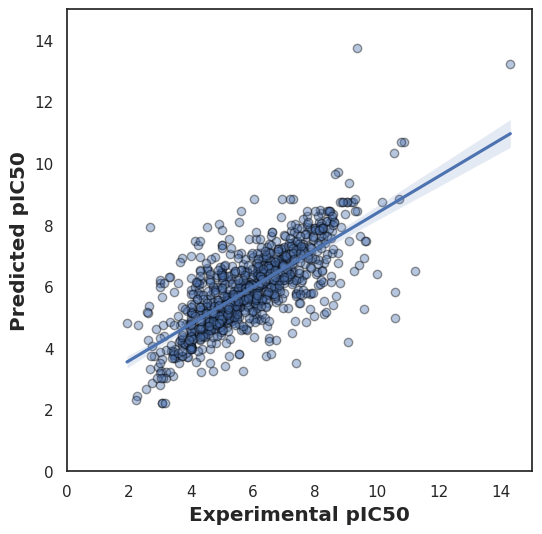

In [109]:
sns.set(color_codes=True)
sns.set_style("white")

# Combine Y_test and Y_pred into a single DataFrame for sns.regplot()
df_ML = pd.DataFrame({'Experimental pIC50': Y_test, 'Predicted pIC50': Y_pred})

ax = sns.regplot(x='Experimental pIC50', y='Predicted pIC50', data=df_ML, scatter_kws={'alpha':0.4,'edgecolor':'black'})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 15)
ax.set_ylim(0, 15)
ax.figure.set_size_inches(6, 6)
plt.show()

# Part 5: Finding best ML model

📘 **Steps:**

1. Importing Lazypredict library 📚

2. Using **LazyPredict** for Model comparison

3. Charts

---

 ☁ **Lazypredict:**

 offers a rapid way to compare multiple algorithms on your dataset without extensive hyperparameter tuning.


📘 **Step 5.1**

Instaling lib

In [110]:
pip install lazypredict

In [111]:
import lazypredict
from lazypredict.Supervised import LazyRegressor

📘 **Step 5.2:**

Runing LazyPre

In [112]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [113]:
clf = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None)
models_train,predictions_train = clf.fit(X_train, X_train, Y_train, Y_train)     #all should be train ??????
models_test,predictions_test = clf.fit(X_train, X_test, Y_train, Y_test)

 98%|█████████▊| 41/42 [00:57<00:00,  1.03it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003795 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 4053, number of used features: 140
[LightGBM] [Info] Start training from score 5.887797


100%|██████████| 42/42 [00:57<00:00,  1.38s/it]


'tuple' object has no attribute '__name__'
Invalid Regressor(s)


 98%|█████████▊| 41/42 [00:51<00:00,  1.28it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003453 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 4053, number of used features: 140
[LightGBM] [Info] Start training from score 5.887797


100%|██████████| 42/42 [00:51<00:00,  1.23s/it]


In [114]:
predictions_train

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
DecisionTreeRegressor,0.87,0.87,0.57,0.16
ExtraTreeRegressor,0.87,0.87,0.57,0.16
ExtraTreesRegressor,0.87,0.87,0.57,7.46
GaussianProcessRegressor,0.87,0.87,0.57,7.78
RandomForestRegressor,0.83,0.84,0.64,5.94
XGBRegressor,0.83,0.83,0.65,0.37
BaggingRegressor,0.81,0.82,0.68,0.53
MLPRegressor,0.78,0.79,0.73,8.82
HistGradientBoostingRegressor,0.68,0.69,0.89,1.35


In [115]:
predictions_test

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
RandomForestRegressor,0.48,0.55,1.07,5.11
HistGradientBoostingRegressor,0.47,0.55,1.08,2.15
XGBRegressor,0.46,0.54,1.09,0.39
LGBMRegressor,0.45,0.53,1.10,0.36
BaggingRegressor,0.44,0.52,1.11,0.50
MLPRegressor,0.42,0.50,1.13,8.61
SVR,0.40,0.49,1.15,2.80
NuSVR,0.39,0.48,1.16,1.69
KNeighborsRegressor,0.37,0.46,1.17,0.15


📘 **Step 5.3:**

Model performance Chatrs 📊

**R-squared values**

[(0.0, 1.0)]

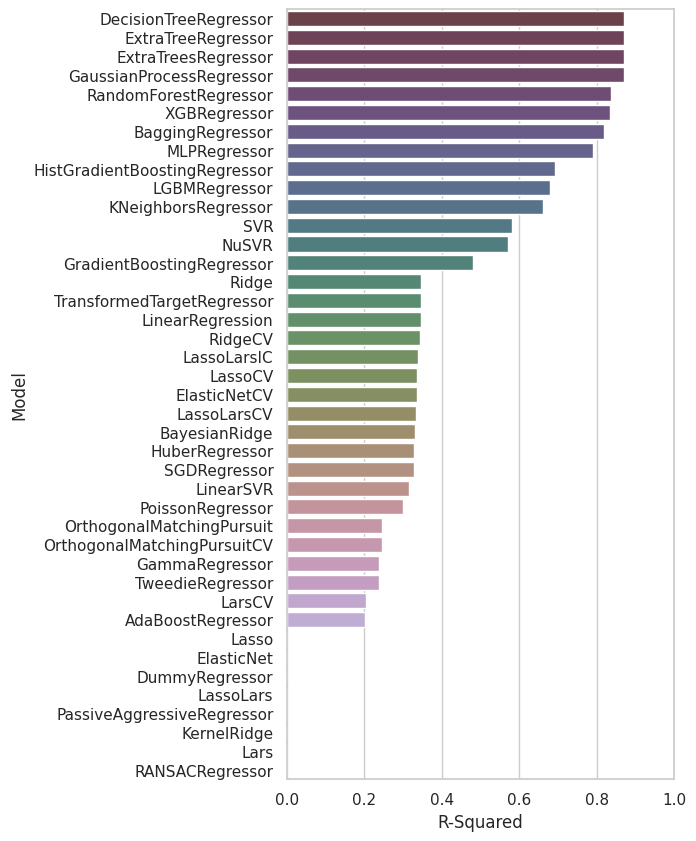

In [116]:
plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
palette = sns.cubehelix_palette(n_colors=len(predictions_train), start=0.5, rot=-3, dark=0.3, light=0.8, reverse=True)
ax = sns.barplot(y=predictions_train.index, x="R-Squared", data=predictions_train, palette=palette)
ax.set(xlim=(0, 1))

**RMSE values**

[(0.0, 10.0)]

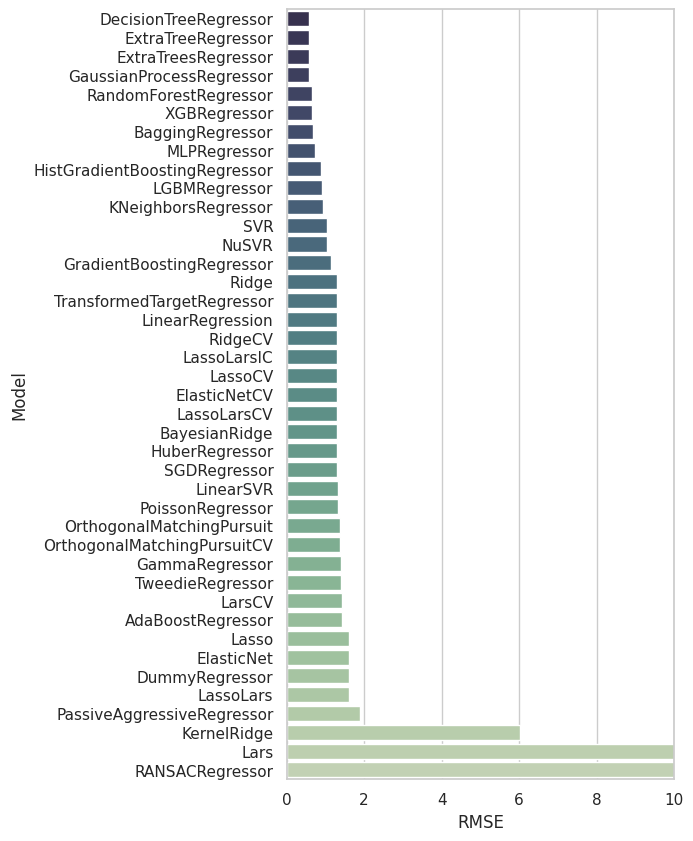

In [117]:
plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
palette = sns.cubehelix_palette(n_colors=len(predictions_train), start=0.5, rot=-0.75, dark=0.2, light=0.8, reverse=True)
ax = sns.barplot(y=predictions_train.index, x="RMSE", data=predictions_train, palette=palette)
ax.set(xlim=(0, 10))

**calculation time**

[(0.0, 10.0)]

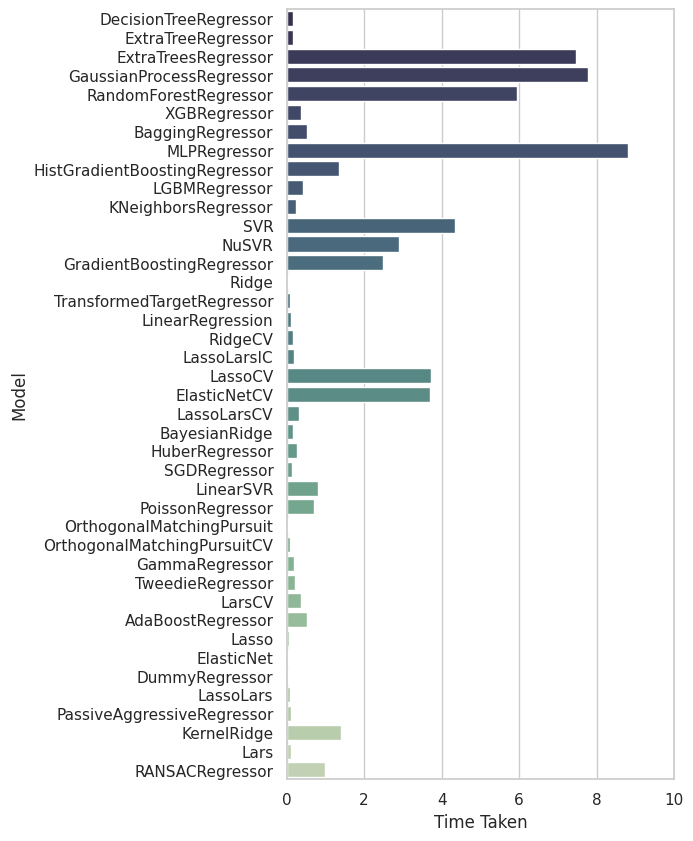

In [118]:
plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
palette = sns.cubehelix_palette(n_colors=len(predictions_train), start=0.5, rot=-0.75, dark=0.2, light=0.8, reverse=True)
ax = sns.barplot(y=predictions_train.index, x="Time Taken", data=predictions_train, palette=palette)
ax.set(xlim=(0, 10))